In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('newdata/reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [3]:
#pip install seaborn

In [4]:
#pip install sklearn

In [16]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.7 MB/s            
     |████████████████████████████████| 233 kB 55.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

In [6]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.580216,-0.207958
Age,0.580216,1.000000,-0.321182
Weight,-0.207958,-0.321182,1.000000


In [7]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [8]:
df.dropna(inplace = True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [9]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


1. Is there any relationship between 'Age' and 'Salary'? (Salary depends on Age?)

  * Salary = b0 + b1*Age
   
  * b0 -> y-intercept (is the value of y when b1=0 or when age has no impact on 'salary')
  * b1 -> slope/increment

In [10]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(x, y)
model_lm

LinearRegression()

In [11]:
print('The y-intercep, b0 = ', model_lm.intercept_)
print('The coefficient of Age, b1 = ', model_lm.coef_)
print('The R-squared value is = ', model_lm.score(x,y))

The y-intercep, b0 =  [349.44580104]
The coefficient of Age, b1 =  [[48.09321584]]
The R-squared value is =  0.380484541757693


In [29]:
modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:12:23   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Salary of a person with age=33?
    * (salary = b0 + b1*age)
    * salary = 349.4458 + 48.0932*33


In [23]:
salary = 349.4458 + 48.0932*33
print("The predicted value of the salary of a 33 year old person is ", salary)

The predicted value of the salary of a 33 year old person is  1936.5214


In [28]:
res0 = 1500.0 - 1936.5214
res1 = 1200.0 - 1936.5214

print('Residual values of the first two rows are: ', res0, '\t', res1)

Residual values of the first two rows are:  -436.5214000000001 	 -736.5214000000001


In [30]:
RESI_A = resultA.resid
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

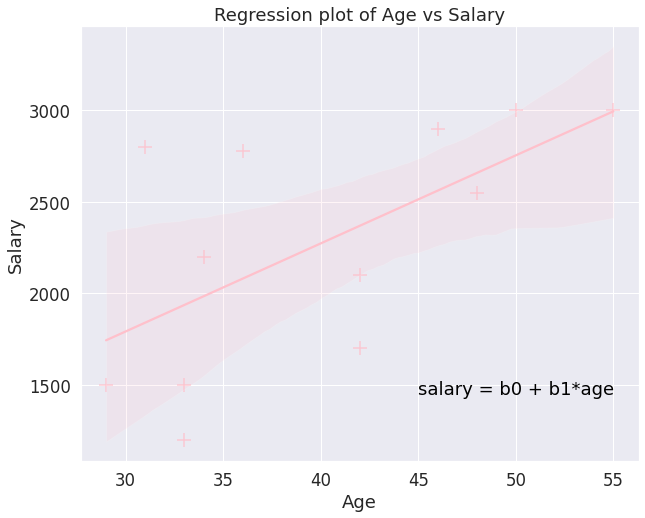

In [67]:
plt.figure(figsize= (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                 y = 'Salary', 
                 data = df,
                 color = 'pink',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel ='Age',
       ylabel = 'Salary')

ax.text(45, 1450, 'salary = b0 + b1*age',
      horizontalalignment = 'left', size = 'medium', color ='black')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

In [53]:
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

In [55]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


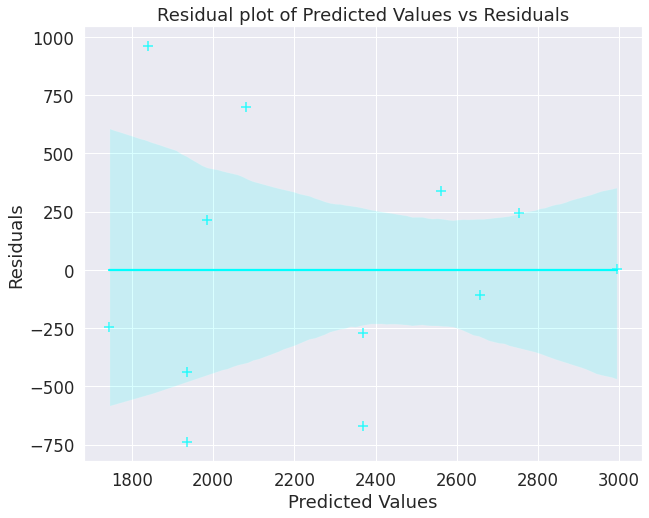

In [65]:
plt.figure(figsize= (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                 y = RESI_A, 
                 data = df,
                 color = 'aqua',
                 marker = '+',
                 scatter_kws = {'s':100}
                )

ax.set(xlabel ='Predicted Values',
       ylabel = 'Residuals')


ax.set_title('Residual plot of Predicted Values vs Residuals')
plt.show()

In [70]:
modelB = sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:36:42   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Salary = b0 + b1*Age + b2*Gender(male+female)

* Salary = 749.8157 + 34.2211 Age + 306.7169 GenderMale

3. What is the salary of a male with age 42?

In [76]:
salaryM = 749.8157 + (34.2211*42) + (306.7169*1)
salaryf = 749.8157 + (34.2211*42) + (306.7169*0)


In [77]:
print('What is the salary of a male with the age of 42?',salaryM)
print('What is the salary of a male with the age of 42?',salaryf)

What is the salary of a male with the age of 42? 2493.8188
What is the salary of a male with the age of 42? 2187.1019
